In [85]:
import pandas as pd 
import numpy as np 
from torchinfo import summary
import matplotlib.pyplot as plt 
import pickle

In [42]:
df =  pd.read_csv('Popular_Baby_Names.csv')

In [43]:
df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57582 entries, 0 to 57581
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       57582 non-null  int64 
 1   Gender              57582 non-null  object
 2   Ethnicity           57582 non-null  object
 3   Child's First Name  57582 non-null  object
 4   Count               57582 non-null  int64 
 5   Rank                57582 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


In [45]:
df.describe()

,Year of Birth,Count,Rank
count,57582.000000,57582.000000,57582.000000
mean,2013.283352,33.929596,57.066114
std,2.056076,39.027451,25.519447
min,2011.000000,10.000000,1.000000
25%,2012.000000,13.000000,38.000000
50%,2013.000000,20.000000,59.000000
75%,2014.000000,36.000000,78.000000
max,2019.000000,426.000000,102.000000


In [46]:
df['Child\'s First Name'].value_counts()

Avery      114
Riley      102
Ariel       88
Dylan       83
Jordan      81
          ... 
Anahi        1
Arden        1
Jolie        1
Ronaldo      1
Demi         1
Name: Child's First Name, Length: 3211, dtype: int64

In [47]:
df['Ethnicity'].value_counts()

HISPANIC                      16930
WHITE NON HISPANIC            16127
BLACK NON HISPANIC             8335
ASIAN AND PACIFIC ISLANDER     7830
WHITE NON HISP                 4142
ASIAN AND PACI                 2125
BLACK NON HISP                 2093
Name: Ethnicity, dtype: int64

In [48]:
df['Gender'] = df['Gender'].astype('category').apply(lambda x: x.upper())
df['Child\'s First Name'] = df['Child\'s First Name'].astype('category').apply(lambda x: x.upper())
df['Ethnicity'] = df['Ethnicity'].astype('category').apply(lambda x: x.upper())
df['Year of Birth'] = df['Year of Birth'].astype('category')


## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

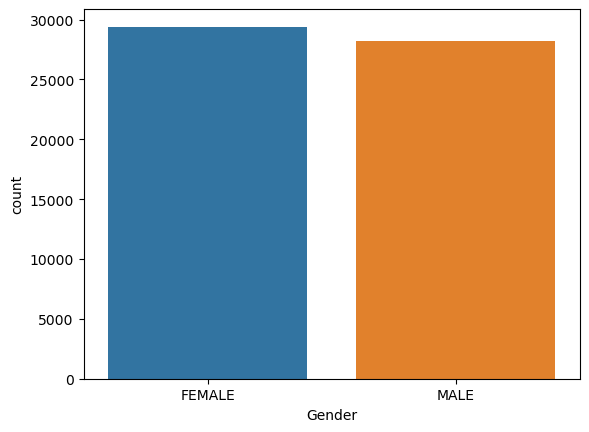

In [49]:
import seaborn as sns
sns.countplot(data=df, x='Gender')

<Axes: xlabel='Rank', ylabel='Count'>

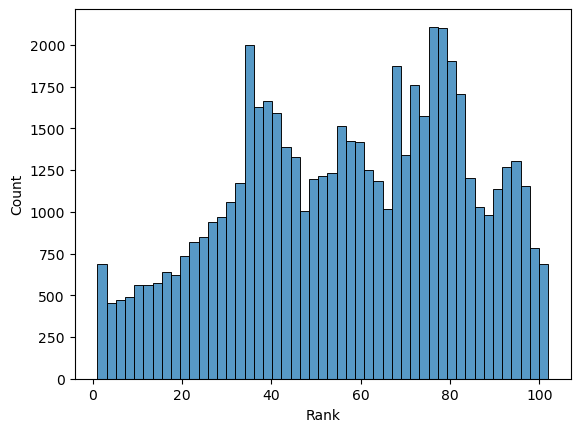

In [50]:
sns.histplot(data=df, x='Rank')

<Axes: xlabel='Count', ylabel='Count'>

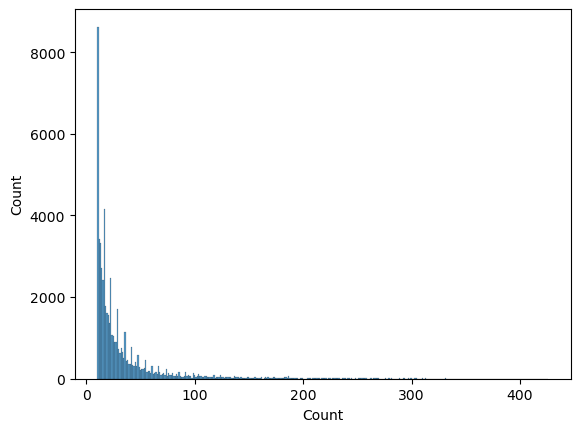

In [51]:
sns.histplot(data=df, x='Count')

/var/folders/rz/xhrygs395zl_w0ctc7cyzsxc0000gn/T/ipykernel_42129/3511035006.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('Ethnicity').median()['Rank'])


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'ASIAN AND PACI'),
  Text(1, 0, 'ASIAN AND PACIFIC ISLANDER'),
  Text(2, 0, 'BLACK NON HISP'),
  Text(3, 0, 'BLACK NON HISPANIC'),
  Text(4, 0, 'HISPANIC'),
  Text(5, 0, 'WHITE NON HISP'),
  Text(6, 0, 'WHITE NON HISPANIC')])

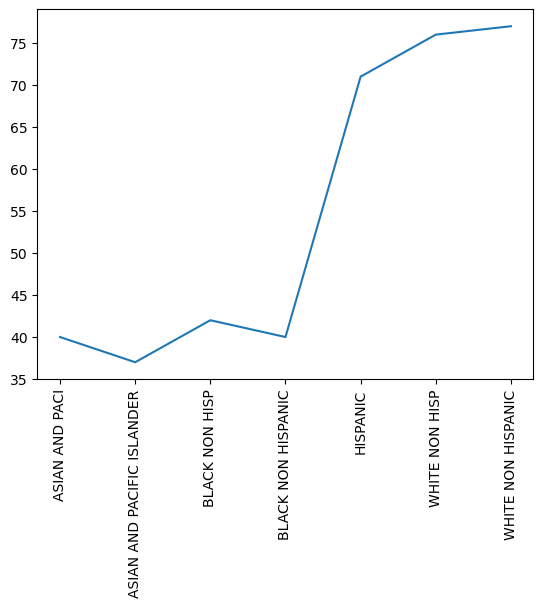

In [52]:
plt.plot(df.groupby('Ethnicity').median()['Rank'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ASIAN AND PACI'),
  Text(1, 0, 'ASIAN AND PACIFIC ISLANDER'),
  Text(2, 0, 'BLACK NON HISP'),
  Text(3, 0, 'BLACK NON HISPANIC'),
  Text(4, 0, 'HISPANIC'),
  Text(5, 0, 'WHITE NON HISP'),
  Text(6, 0, 'WHITE NON HISPANIC')])

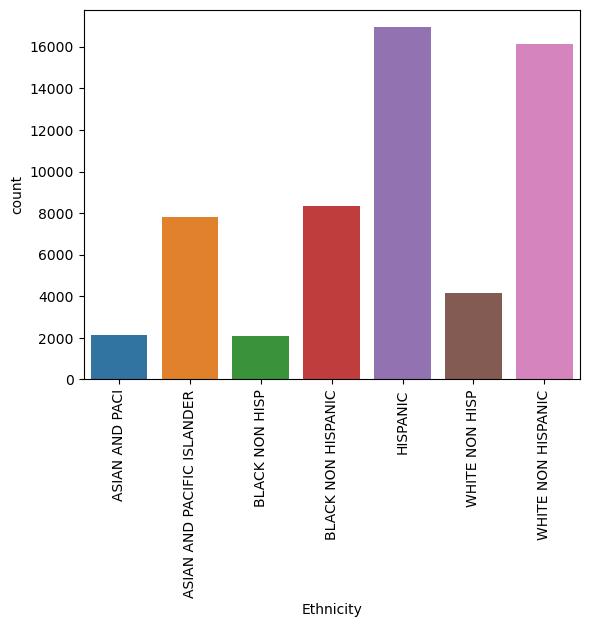

In [53]:
sns.countplot(data=df, x='Ethnicity')
plt.xticks(rotation=90)

<Axes: xlabel='Count', ylabel='Rank'>

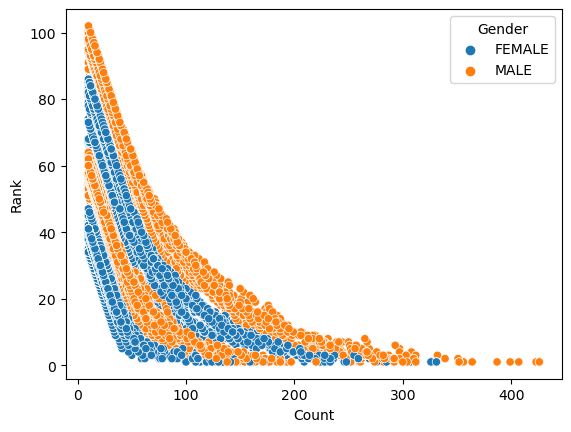

In [54]:
sns.scatterplot(data=df,x='Count',y='Rank', hue='Gender', )

In [55]:
X = df.drop('Gender',axis=1)
y = df['Gender'].values.reshape(-1,1)

In [56]:
X = pd.get_dummies(X)

In [57]:
y = pd.get_dummies(y,drop_first=True)
y.columns = ['Gender']
y

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
57577,1
57578,1
57579,1
57580,1


In [58]:
X

,Count,Rank,Year of Birth_2011,Year of Birth_2012,Year of Birth_2013,Year of Birth_2014,Year of Birth_2015,Year of Birth_2016,Year of Birth_2017,Year of Birth_2018,...,Child's First Name_ZEV,Child's First Name_ZHURI,Child's First Name_ZION,Child's First Name_ZISSY,Child's First Name_ZOE,Child's First Name_ZOEY,Child's First Name_ZORA,Child's First Name_ZOYA,Child's First Name_ZURI,Child's First Name_ZYAIRE
0,13,75,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,67,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,42,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38,51,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,53,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57577,18,94,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57578,24,88,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57579,16,96,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57580,90,39,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preporcessing

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

## Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score


/Users/charankumarnara/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
accuracy_score(y_pred, y_test) * 100

99.93922028305983

In [62]:
pd.Series(y_pred).astype('category').value_counts()

0    5860
1    5657
dtype: int64

In [63]:
y_test.astype('category').value_counts()

Gender
0         5865
1         5652
dtype: int64

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5865
           1       1.00      1.00      1.00      5652

    accuracy                           1.00     11517
   macro avg       1.00      1.00      1.00     11517
weighted avg       1.00      1.00      1.00     11517



## Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

/Users/charankumarnara/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5865
           1       1.00      1.00      1.00      5652

    accuracy                           1.00     11517
   macro avg       1.00      1.00      1.00     11517
weighted avg       1.00      1.00      1.00     11517



## Decision Tree model

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred3 = dt.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5865
           1       1.00      0.99      1.00      5652

    accuracy                           1.00     11517
   macro avg       1.00      1.00      1.00     11517
weighted avg       1.00      1.00      1.00     11517



### Choosing best model as decision tree model

In [89]:
logmodel_weights_path = 'decision_tree_model.pkl'
with open(logmodel_weights_path, 'wb') as f:
    pickle.dump(dt, f)

### Comparison graphs

In [68]:
accuracies = {}

In [69]:
accuracies['log'] = accuracy_score(y_test, y_pred)
accuracies['rfc'] = accuracy_score(y_test, y_pred2)
accuracies['dt'] = accuracy_score(y_test, y_pred3)
print("Logistic Regression Accuracy: ", accuracies['log'])
print("Random Forest Accuracy: ",accuracies['rfc'])
print("Decision Tree Accuracy: ",accuracies['dt'])

from sklearn.metrics import log_loss
logistic_regression_predicted_probs = lr.predict_proba(X_test)
logistic_regression_loss = log_loss(y_test, logistic_regression_predicted_probs)
print("Logistic Regression Loss:", logistic_regression_loss)

Logistic Regression Accuracy:  0.9993922028305983
Random Forest Accuracy:  1.0
Decision Tree Accuracy:  0.9967873578188764
Logistic Regression Loss: 0.0044573590738987805


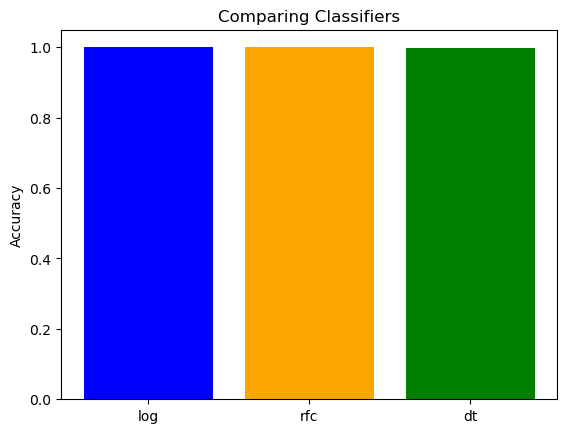

In [70]:
plt.bar(range(len(accuracies)), list(accuracies.values()), align='center', color=['blue', 'orange', 'green'])
plt.xticks(range(len(accuracies)), list(accuracies.keys()))
plt.ylabel('Accuracy')
plt.title('Comparing Classifiers')
plt.show()

In [71]:
df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,YOUSEF,18,94
57578,2014,MALE,WHITE NON HISPANIC,YOUSSEF,24,88
57579,2014,MALE,WHITE NON HISPANIC,YUSUF,16,96
57580,2014,MALE,WHITE NON HISPANIC,ZACHARY,90,39


## Training with Neural Networks

In [72]:
import torch
import torch.nn as nn

import torch.optim as optim
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

In [73]:
class ShallowNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  
        self.fc2 = nn.Linear(hidden_dim, output_dim) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.sigmoid(self.fc2(x))  
        return x

    def summary(self):
        return summary(model)
# Define the dimensions for your network
input_dim = X.shape[1]
hidden_dim = 100  
output_dim = 1  

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = ShallowNN(input_dim, hidden_dim, output_dim)
model.to(device)


print(model)
print(model.summary())

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')


ShallowNN(
  (fc1): Linear(in_features=1956, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)
Layer (type:depth-idx)                   Param #
ShallowNN                                --
├─Linear: 1-1                            195,700
├─Linear: 1-2                            101
Total params: 195,801
Trainable params: 195,801
Non-trainable params: 0
Epoch 0, Loss: 0.8338
Epoch 100, Loss: 0.0189
Epoch 200, Loss: 0.0120
Epoch 300, Loss: 0.0093
Epoch 400, Loss: 0.0074
Epoch 500, Loss: 0.0059
Accuracy: 0.9989


## Tuning Optimizer

In [74]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')

Epoch 0, Loss: 0.0059
Epoch 100, Loss: 0.0059
Epoch 200, Loss: 0.0059
Epoch 300, Loss: 0.0058
Epoch 400, Loss: 0.0058
Epoch 500, Loss: 0.0058
Accuracy: 0.9989


In [75]:
criterion = nn.BCELoss()
optimizer = optim.Adamax(model.parameters(), lr=0.01)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')

Epoch 0, Loss: 0.0058
Epoch 100, Loss: 0.0051
Epoch 200, Loss: 0.0047
Epoch 300, Loss: 0.0043
Epoch 400, Loss: 0.0039
Epoch 500, Loss: 0.0035
Accuracy: 0.9997


## Tuning Learning rate

In [76]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')

Epoch 0, Loss: 0.0035
Epoch 100, Loss: 0.0032
Epoch 200, Loss: 0.0027
Epoch 300, Loss: 0.0024
Epoch 400, Loss: 0.0020
Epoch 500, Loss: 0.0018
Accuracy: 0.9999


In [77]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')

Epoch 0, Loss: 0.0018
Epoch 100, Loss: 48.9389
Epoch 200, Loss: 48.9389
Epoch 300, Loss: 48.9389
Epoch 400, Loss: 48.9389
Epoch 500, Loss: 48.9389
Accuracy: 0.5106


## Tuning hidden layers

In [82]:
class TuningNN2(nn.Module):
    def __init__(self, input_dim, hidden_dim,hidden_dim2, output_dim):
        super(TuningNN2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        
        self.fc3 = nn.Linear(hidden_dim2, output_dim)


    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  
        return x
    
    def summary(self):
        return summary(model)
    
input_dim = X.shape[1]
hidden_dim = 700
hidden_dim2 = 100
output_dim = 1 
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = TuningNN2(input_dim, hidden_dim,hidden_dim2, output_dim)
model.to(device)
print(model.summary())
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')

Layer (type:depth-idx)                   Param #
TuningNN2                                --
├─Linear: 1-1                            1,369,900
├─Linear: 1-2                            70,100
├─Linear: 1-3                            101
Total params: 1,440,101
Trainable params: 1,440,101
Non-trainable params: 0
Epoch 0, Loss: 0.6878
Epoch 100, Loss: 0.0086
Epoch 200, Loss: 0.0035
Epoch 300, Loss: 0.0016
Epoch 400, Loss: 0.0008
Epoch 500, Loss: 0.0005
Accuracy: 1.0000


In [83]:
class TuningNN3(nn.Module):
    def __init__(self, input_dim, hidden_dim,hidden_dim2, hidden_dim3, output_dim):
        super(TuningNN3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)

        self.fc4 = nn.Linear(hidden_dim3, output_dim)


    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  
        return x
    def summary(self):
        return summary(model)
    
input_dim = X.shape[1]
hidden_dim = 900
hidden_dim2 = 500
hidden_dim3 = 100
output_dim = 1  
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = TuningNN3(input_dim, hidden_dim,hidden_dim2, hidden_dim3, output_dim)
model.to(device)
print(model.summary())
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(501):

    X, y = X.to(device), y.to(device)
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy:.4f}')

Layer (type:depth-idx)                   Param #
TuningNN3                                --
├─Linear: 1-1                            1,761,300
├─Linear: 1-2                            450,500
├─Linear: 1-3                            50,100
├─Linear: 1-4                            101
Total params: 2,262,001
Trainable params: 2,262,001
Non-trainable params: 0
Epoch 0, Loss: 0.6939
Epoch 100, Loss: 0.0020
Epoch 200, Loss: 0.0005
Epoch 300, Loss: 0.0002
Epoch 400, Loss: 0.0000
Epoch 500, Loss: 0.0000
Accuracy: 1.0000


### Saving the best model

In [92]:
torch.save(model.state_dict(), 'cnara_assignment0_part1_NN.h5')